## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy  as np
from sklearn import cluster
from scipy import misc
from random import randrange
from numpy import zeros

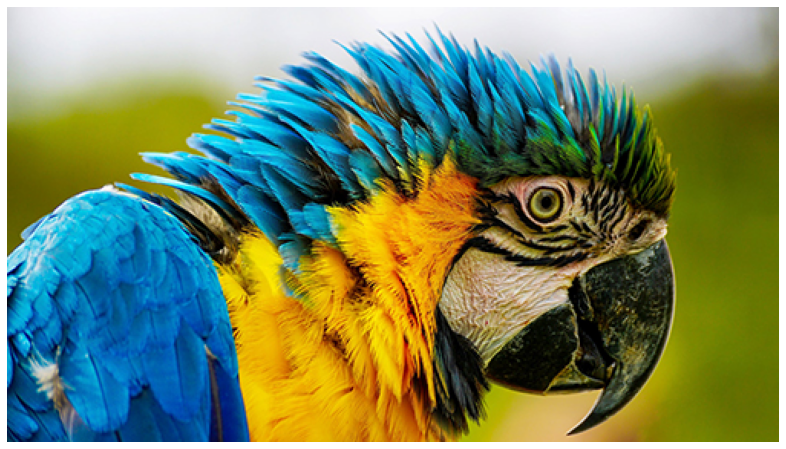

In [2]:
# Load an image.
imagex = image.imread("parrot_small.jpg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [3]:
max_iterations = 30

def checkSameArray(arr1, arr2):
    return np.array_equal(np.array(arr1), np.array(arr2))

def initialiseCentroids(data, numclusters):
    centroids = []
    for i in range(0, numclusters):
        centroids.append(data[randrange(0, len(data))])
    return centroids

def manualkmeans(data, k):
    # Give centroids an initial random value (this is one of the existing dots)
    centroids = initialiseCentroids(data, k)
    oldCentroids = None
    iterations = 0
    labels = None
    # Main loop
    while not shouldStop(oldCentroids, centroids, iterations):
        iterations = iterations + 1
        oldCentroids = centroids
        labels = getLabels(data, centroids)
        centroids = getCentroids(data, labels, k)
    return labels

def shouldStop(oldCentroids, centroids, iterations):
    if iterations > max_iterations:
        return True
    return checkSameArray(oldCentroids, centroids)

# Get labels for each piece of data
def getLabels(data, centroids):
    labels = [-1] * len(data)
    
    # For each element in the dataset, choose the closest centroid. 
    for i in range(0, len(data)):
        distance = sys.maxsize - 1
        
        # compare data point with each centroid
        for j in range(0, len(centroids)):
            tempdistance = np.sqrt(sum((data[i] - centroids[j]) ** 2))
            if tempdistance < distance:
                labels[i] = j
                distance = tempdistance
    return labels

def getCentroids(data, labels, k):
    total = [[0] * k for i in range(len(data[0]))]
    count = [0] * k
    centroids = [0] * k
        
    # Go through the data set ONCE, noting totals/counts for all clusters
    for j in range(len(data)):
        clusterno = labels[j]
        
        # Go through x, y, z, values k times, adding the values to the old ones
        for counter in range(len(data[0])):
            total[counter][clusterno] = total[counter][clusterno] + data[j][counter]
        count[clusterno] = count[clusterno] + 1
    
    # If a centroid is empty, we re-initialise it with a random value
    if 0 in count:
        for element in count:
            if element == 0:
                centroids[element] = data[randrange(0, len(data))]
    
    # Calculate means
    for i in range(k):
        if count[i] != 0:
            centroids[i] = [total[0][i]/count[i], total[1][i]/count[i], total[2][i]/count[i]]
    
    return centroids

In [4]:
# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 5 # How many clusters we want

# kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
# kmeans_cluster.fit(image_2d) # Apply it to the data
# cluster_centers = kmeans_cluster.cluster_centers_ # we're not using these
# cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

# Manual, handwritten code for k_means    
cluster_labels = manualkmeans(image_2d, cluster_count)

In [5]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[220. 223. 228.   0.]
[105. 111.   2.   1.]
[213. 164.   6.   2.]
[19. 32. 18.  3.]
[  4. 122. 181.   4.]


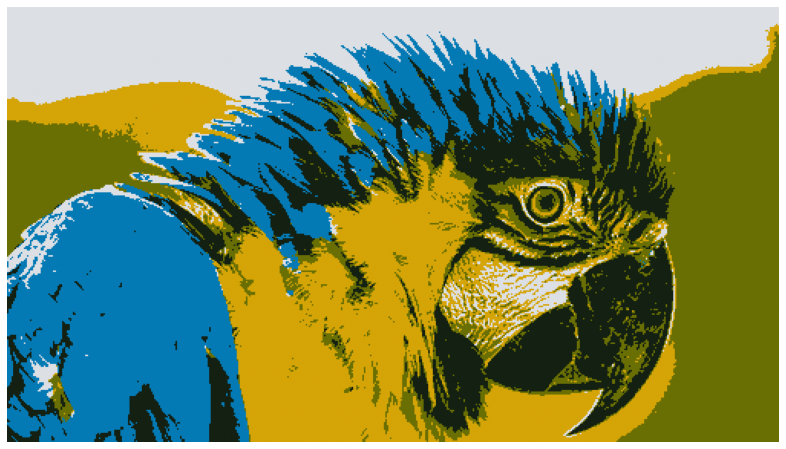

In [6]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')